Group 4 members:
1. Narayan Badri S
2. Neha Kasangotu
3. Siri Dhathrika
4. Yash Shrivastava

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [5]:
worksheet = gc.open('Cancer_Dataset_Infy').sheet1
print (worksheet)

<Worksheet 'Sheet1' id:0>


In [6]:
dataset = worksheet.get_all_values()
print(dataset)
data = pd.DataFrame(dataset[1:], columns=dataset[0])  # Assuming the first row is the header

[['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'], ['P1', '33', '1', '2', '4', '5', '4', '3', '2', '2', '4', '3', '2', '2', '4', '3', '4', '2', '2', '3', '1', '2', '3', '4', 'Low'], ['P10', '17', '1', '3', '1', '5', '3', '4', '2', '2', '2', '2', '4', '2', '3', '1', '3', '7', '8', '6', '2', '1', '7', '2', 'Medium'], ['P100', '35', '1', '4', '5', '6', '5', '5', '4', '6', '7', '2', '3', '4', '8', '8', '7', '9', '2', '1', '4', '6', '7', '2', 'High'], ['P1000', '37', '1', '7', '7', '7', '7', '6', '7', '7', '7', '7', '7', '7', '8', '4', '2', '3', '1', '4', '5', '6', '7', '5', 'High'], ['P101', '46', '1', '6', '8', '7', '7', '7', '6', '7', '7', '8'

In [7]:
count_column = data.shape[1]
count_row = data.shape[0]
print("Number of columns:")
print(count_column)
print("Number of Rows:")
print(count_row)

Number of columns:
25
Number of Rows:
1000


In [8]:
data.drop("Patient Id", axis=1, inplace=True)

# Cleaning Column Names
data.rename(columns=str.lower, inplace=True)
data.rename(columns={col: col.replace(" ", "_") for col in data.columns}, inplace=True)

# Display Data After Cleaning
display(data)

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [9]:
# Changing name of data to df
df = data
display(df)

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [10]:
# Concise Summary
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   object
 1   gender                    1000 non-null   object
 2   air_pollution             1000 non-null   object
 3   alcohol_use               1000 non-null   object
 4   dust_allergy              1000 non-null   object
 5   occupational_hazards      1000 non-null   object
 6   genetic_risk              1000 non-null   object
 7   chronic_lung_disease      1000 non-null   object
 8   balanced_diet             1000 non-null   object
 9   obesity                   1000 non-null   object
 10  smoking                   1000 non-null   object
 11  passive_smoker            1000 non-null   object
 12  chest_pain                1000 non-null   object
 13  coughing_of_blood         1000 non-null   object
 14  fatigue                  

In [11]:
# Convert relevant columns to numeric, handling errors
for col in data.columns:
    if col not in ['level']:  # Exclude non-numeric columns
        try:
            data[col] = pd.to_numeric(data[col], errors='coerce') #'coerce' set invalid parsing to NaN
        except:
            print(f"Could not convert column '{col}' to numeric.")
# Display info to confirm data type changes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   int64 
 2   air_pollution             1000 non-null   int64 
 3   alcohol_use               1000 non-null   int64 
 4   dust_allergy              1000 non-null   int64 
 5   occupational_hazards      1000 non-null   int64 
 6   genetic_risk              1000 non-null   int64 
 7   chronic_lung_disease      1000 non-null   int64 
 8   balanced_diet             1000 non-null   int64 
 9   obesity                   1000 non-null   int64 
 10  smoking                   1000 non-null   int64 
 11  passive_smoker            1000 non-null   int64 
 12  chest_pain                1000 non-null   int64 
 13  coughing_of_blood         1000 non-null   int64 
 14  fatigue                  

In [12]:
# Checking the actual column names in our DataFrame
print(df.columns)

Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level'],
      dtype='object')


In [13]:
# We are selecting specific columns from the DataFrame
X = df.drop(columns ="level")

Y = df['level']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

X_train.shape, X_test.shape

((800, 23), (200, 23))

In [14]:
# Feature Scaling
cols = X_train.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [16]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, Y_train)

# Predict the Test set results
Y_pred = rfc.predict(X_test)

# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with decision-trees : 1.0000


In [17]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training set
rfc_100.fit(X_train, Y_train)

# Predict on the test set results
Y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_100)))

Model accuracy score with 100 decision-trees : 1.0000


In [18]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training set
clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [19]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

,0
coughing_of_blood,0.105510
passive_smoker,0.100716
obesity,0.097174
wheezing,0.080157
fatigue,0.061074
smoking,0.049223
balanced_diet,0.045874
swallowing_difficulty,0.044281
shortness_of_breath,0.043364
chest_pain,0.040416


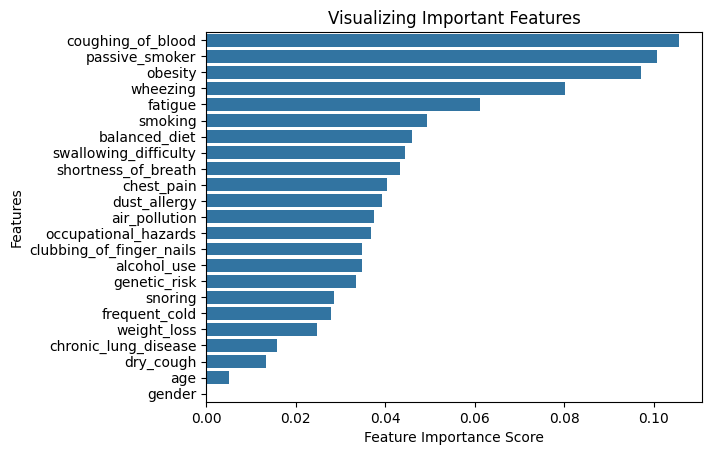

In [20]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores.values, y=feature_scores.index.get_level_values(0))
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [21]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        75
         Low       1.00      1.00      1.00        67
      Medium       1.00      1.00      1.00        58

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [37]:
# Taking 'coughing_of_blood', 'passive_smoker'
a= df[['coughing_of_blood', 'passive_smoker']]
b = df['level']
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state =42)

In [38]:
a_train.shape, a_test.shape

((700, 2), (300, 2))

In [39]:
# Feature Scaling
colss = a_train.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)

In [40]:
X_train = pd.DataFrame(X_train, columns=[colss])
X_test = pd.DataFrame(X_test, columns=[colss])

In [41]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(a_train, b_train)

# Predict the Test set results
b_pred = rfc.predict(a_test)

# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with decision-trees : {0:0.4f}'. format(accuracy_score(b_test, b_pred)))

Model accuracy score with decision-trees : 0.9433


In [42]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training set
rfc_100.fit(a_train, b_train)

# Predict on the test set results
b_pred_100 = rfc_100.predict(a_test)

# Check accuracy score
print('Model accuracy score with decision-trees : {0:0.4f}'. format(accuracy_score(b_test, b_pred_100)))

Model accuracy score with decision-trees : 0.9433


In [49]:
# import warnings
# warnings.filterwarnings("ignore")

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        75
         Low       1.00      1.00      1.00        67
      Medium       1.00      1.00      1.00        58

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
ada = AdaBoostClassifier(algorithm ='SAMME')
params = {
    'n_estimators':[100],
    'learning_rate': np.arange(0.01, 2.01, 0.01),}

nada = RandomizedSearchCV (ada, param_distributions = params, cv = 10, n_jobs = -1, scoring = 'accuracy')
nada.fit (X_train, Y_train)
print(nada.best_params_)
print(nada.best_score_)
nrf = nada.best_estimator_

{'n_estimators': 100, 'learning_rate': 0.21000000000000002}
0.8150000000000001


In [51]:
Y_Pred_train = nada.predict (X_train)
Y_Pred = nada.predict (X_test)
print("Training Accuracy: ", accuracy_score(Y_train, Y_Pred_train))
print("Testing Accuracy: ", accuracy_score(Y_test, Y_Pred))
print("Classification Report:", classification_report(Y_test, Y_Pred))

Training Accuracy:  0.82625
Testing Accuracy:  0.84
Classification Report:               precision    recall  f1-score   support

        High       0.99      1.00      0.99        75
         Low       0.89      0.60      0.71        67
      Medium       0.67      0.91      0.77        58

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.83       200
weighted avg       0.86      0.84      0.84       200

